In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
303            5      115             98              0        0  52.9   
320            4      129             60             12      231  27.5   
207            5      162            104              0        0  37.7   
25            10      125             70             26      115  31.1   
79             2      112             66             22        0  25.0   

     DiabetesPedigreeFunction  Age  Outcome  
303                     0.209   28        1  
320                     0.527   31        0  
207                     0.151   52        1  
25                      0.205   41        1  
79                      0.307   24        0

* There is no null value in this dataset

In [4]:
x=data.iloc[:,0:8]
y=data.iloc[:,-1]

In [5]:
x

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

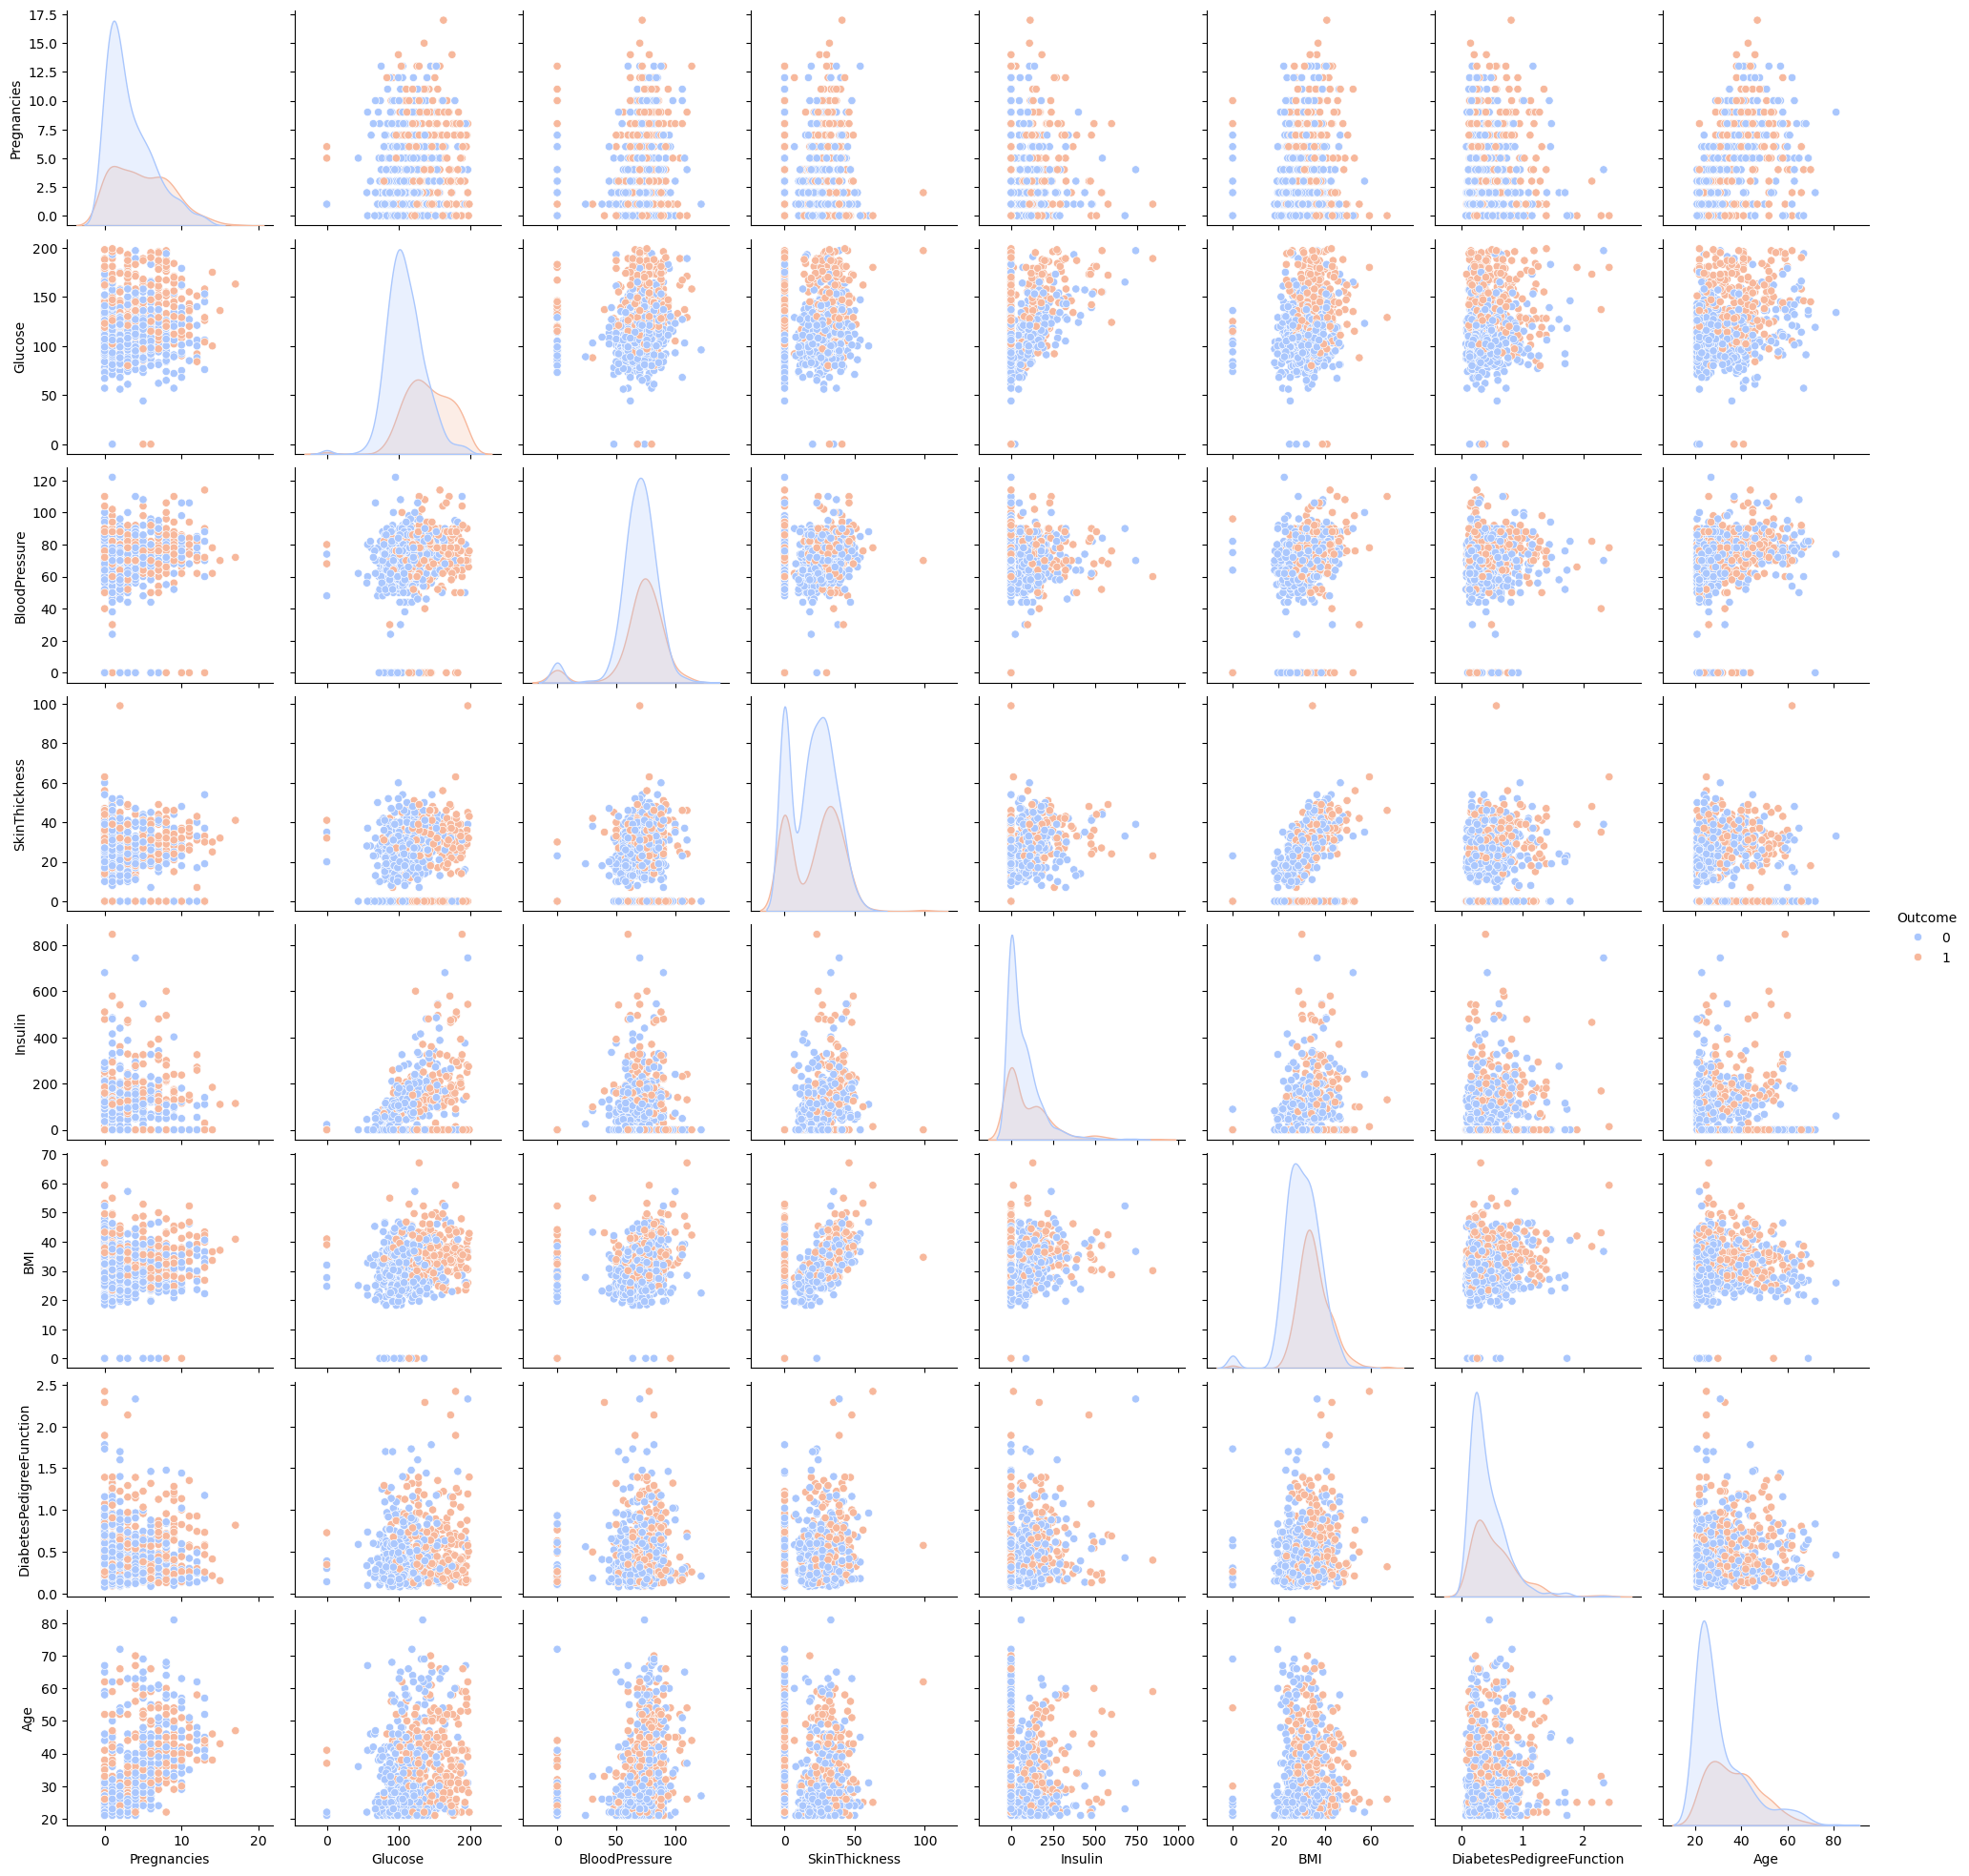

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


sns.pairplot(data, hue='Outcome',  palette='coolwarm')


Text(0.5, 1.0, 'Correlation Heatmap Between Features')

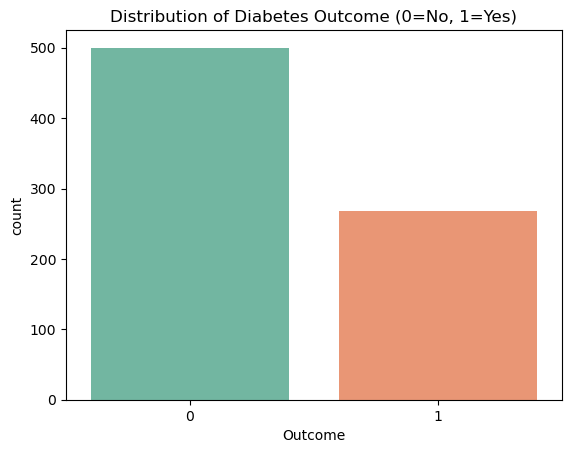

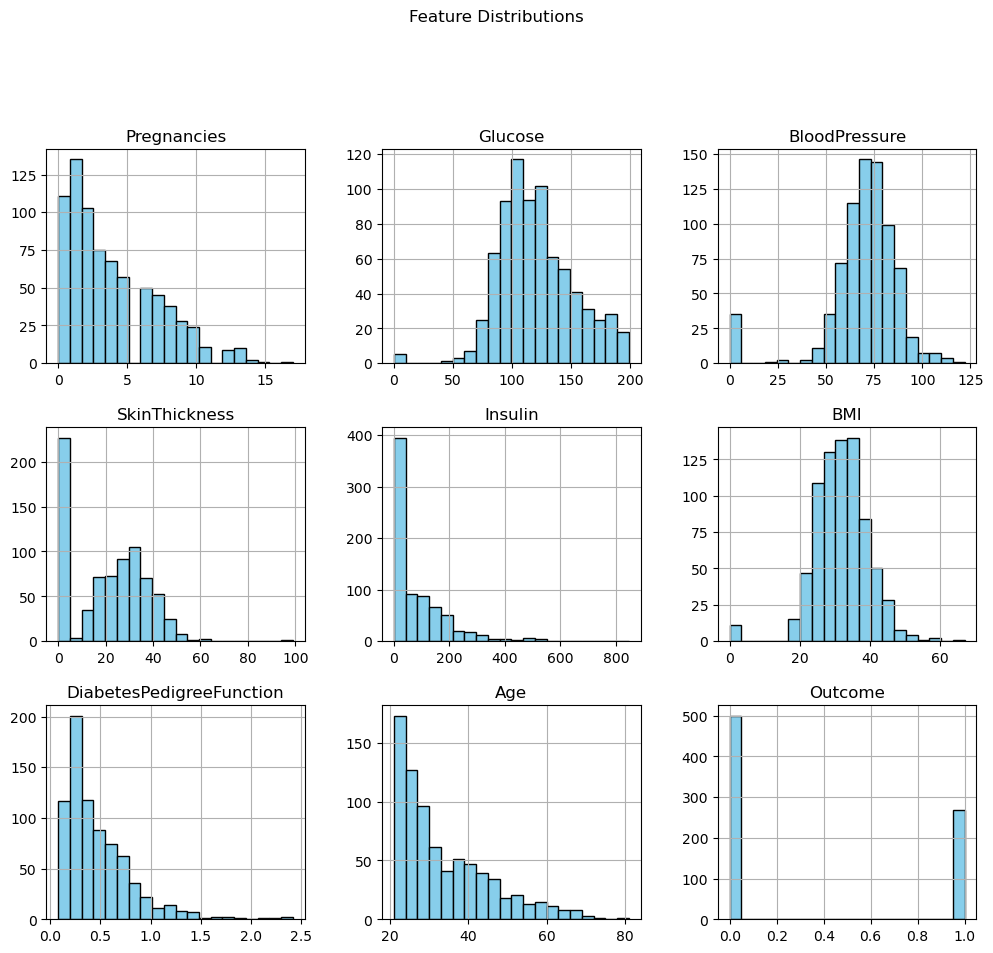

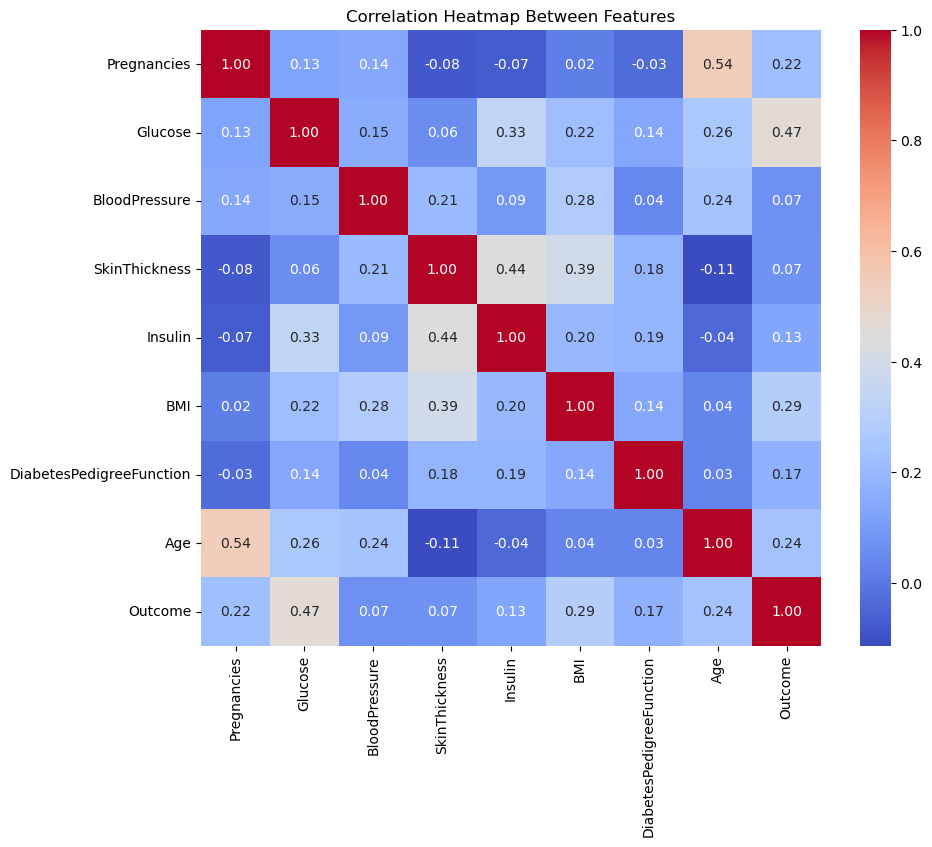

In [8]:
sns.countplot(x='Outcome', data=data, palette='Set2')
plt.title("Distribution of Diabetes Outcome (0=No, 1=Yes)")


data.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", y=1.02)

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap Between Features")




Text(0.5, 1.0, 'Glucose vs BMI colored by Outcome')

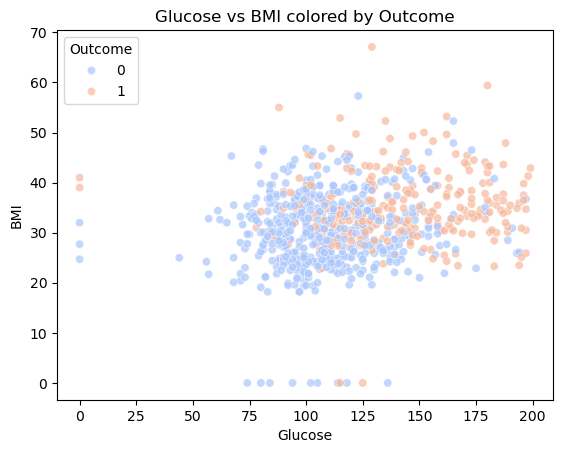

In [9]:
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=data, alpha=0.7, palette='coolwarm')
plt.title("Glucose vs BMI colored by Outcome")



In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from imblearn.over_sampling import ADASYN
from sklearn.metrics  import recall_score,precision_score,accuracy_score
import joblib
from sklearn.model_selection import GridSearchCV
from 

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3,stratify=y)

cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
sampler=ADASYN(random_state=42)


In [13]:
pipe_rf = ImbPipeline([
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced_subsample'))
])  
param_rf = {
    'clf__n_estimators':[100, 200,300,400],
    'clf__max_depth': [5,6,7,8,9],
    'clf__min_samples_leaf': [1, 2]
}


In [14]:
grid = GridSearchCV(estimator=pipe_rf, param_grid=param_rf, scoring='recall', n_jobs=1, verbose=1, cv=cv)
grid.fit(x_train, y_train)
best_rf_pipeline = grid.best_estimator_

   

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [15]:
best_rf_pipeline

Pipeline(steps=[('clf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=5, n_estimators=300,
                                        n_jobs=-1, random_state=42))])

In [17]:
y_score_rf = best_rf_pipeline.predict_proba(x_test)[:, 1]

In [20]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score_rf)

In [21]:
thresholds


array([       inf, 0.86167606, 0.80269449, 0.79875457, 0.78170567,
       0.77739132, 0.75040611, 0.73694705, 0.73255778, 0.72494478,
       0.71856765, 0.71223445, 0.71102311, 0.70430114, 0.69878403,
       0.68605768, 0.6777358 , 0.67201693, 0.65156994, 0.64264724,
       0.63479074, 0.63011307, 0.62098926, 0.60176819, 0.59599655,
       0.59553626, 0.59237838, 0.59174198, 0.58190539, 0.58177078,
       0.57128158, 0.5701013 , 0.5682383 , 0.56437636, 0.55451775,
       0.54884321, 0.54659119, 0.52571654, 0.52362861, 0.5218537 ,
       0.51234107, 0.49990769, 0.49841078, 0.49533541, 0.49310637,
       0.48561   , 0.48488825, 0.46770718, 0.46582727, 0.46528715,
       0.42288759, 0.42030921, 0.41373964, 0.40096639, 0.39154594,
       0.38760582, 0.38134774, 0.38012002, 0.37672229, 0.37555941,
       0.37454415, 0.3632925 , 0.35892654, 0.30954939, 0.30929924,
       0.28474602, 0.2836183 , 0.24920215, 0.24509561, 0.22918679,
       0.22697142, 0.19538528, 0.19435148, 0.19277281, 0.19045

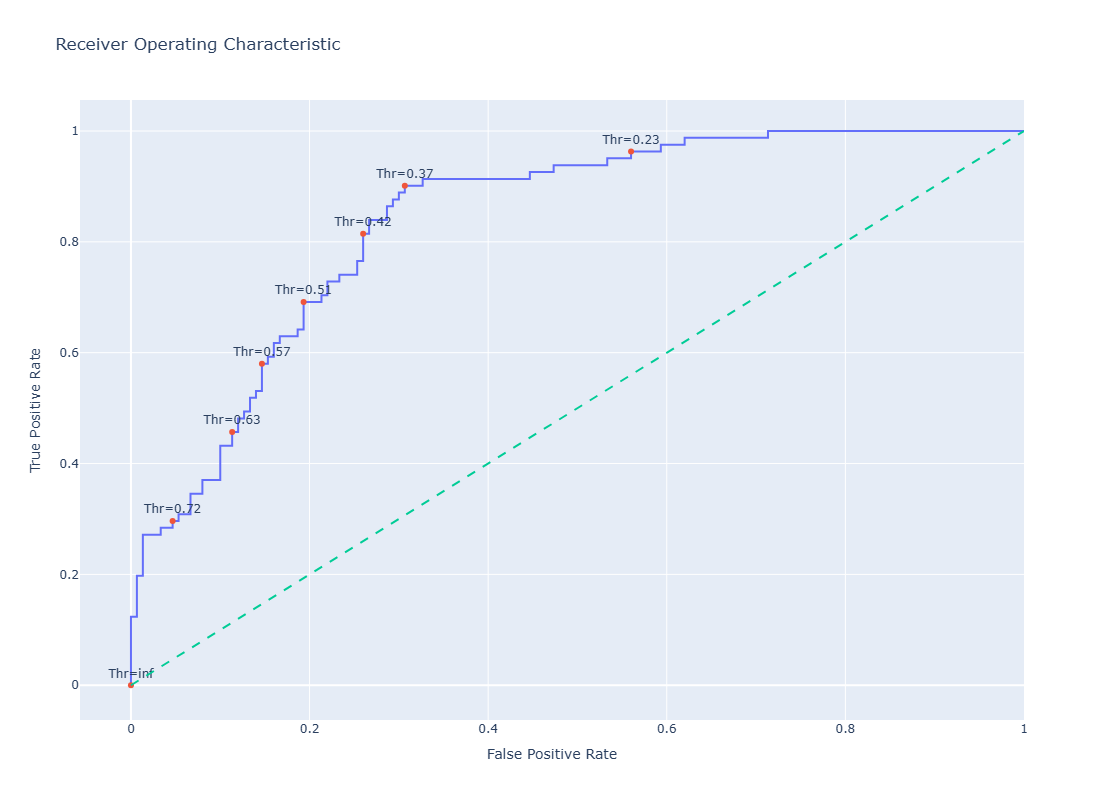

In [24]:
import plotly.graph_objects as go



# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode='markers+text',
    name='Threshold points',
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]],
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)
fig.show()

In [25]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold is:", optimal_threshold)

Optimal threshold is: 0.3745441481764276


In [29]:
optimal_threshold=0.3745
y_pred_optimal = (y_score_rf >= optimal_threshold).astype(int)



print("Accuracy:", accuracy_score(y_test, y_pred_optimal))
print("Precision:", precision_score(y_test, y_pred_optimal))
print("Recall:", recall_score(y_test, y_pred_optimal))



Accuracy: 0.7662337662337663
Precision: 0.6134453781512605
Recall: 0.9012345679012346


In [32]:

joblib.dump(best_rf_pipeline, 'best_rf_pipeline.pkl')

print("✅ Model saved successfully as 'best_rf_pipeline.pkl'")


✅ Model saved successfully as 'best_rf_pipeline.pkl'
